## Challenge

As the first challenge of the series, we are proud to present you with a brain stroke prediction challenge. You will be introduced to different concepts in Machine Learning and its implementation. Since this is the first challenge, this notebook serves as an example that will guide you through the generic processes involved when doing an end-to-end Machine Learning project, ranging from data preprocessing, and model training, to submitting your prediction to Doxa. 

![title](https://www.cdc.gov/stroke/images/Stroke-Medical-Illustration.jpg?_=77303?noicon)

**Background**: A stroke, sometimes called a brain attack, occurs when something blocks the blood supply to part of the brain or when a blood vessel in the brain bursts. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. A stroke can cause lasting brain damage, long-term disability, or even death. Early action can reduce brain damage and other complications.

**Objective**: Our objective is to be able to predict whether a person has a stroke or not given some information about them.

**Dataset**: The dataset is attained from [Stroke Prediction Dataset](https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset)

## Machine Learning Workflow

![title](https://miro.medium.com/max/1400/0*V0GyOt3LoDVfY7y5.png)

As you already know, the process involved in Machine Learning covers a wide area. As you step through the notebook, always keep in mind which stage are we dealing with at that moment. And as we reached the end of the notebook, you will realize that Step 06 (Parameter Tuning) on the figure above is missing. Be creative, and try to implement it on your own. There are a lot of resources you can find online that will help you implement this step, which will hopefully improve your score on the leaderboard!

## Preparation

In [42]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import relevant sklearn class/function related to data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder

# Import relevant sklearn class related to Machine Learning model
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.svm import SVC, SVR, NuSVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier

# Import relevant sklearn class/function related to evaluation
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay         

%matplotlib inline

In [43]:
# Import training dataset and save it in a variable called data_original
data_original = pd.read_csv("./data/train.csv")     # Change the PATH accordingly 

# We then make a copy of data_original. This is the variable that we will do some manipulation with it. If we want to refer to our original dataset, we can always refer to data_original variable
data = data_original.copy()              

## Data Understanding & Visualisation

Before we start to train our Machine Learning model, it is important to have a look and understand first the dataset that we will be using. This will provide some insights onto which model, model hyperparameter, and loss function are suitable for the problem we are dealing with. 

In [44]:
# Let's first see the first 15 entries in our dataset
data.head(15)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,18.0,0,0,No,Private,Urban,101.95,46.0,formerly smoked,0
1,Male,60.0,0,0,Yes,Private,Urban,129.16,33.6,smokes,0
2,Female,21.0,0,0,No,Private,Urban,91.01,28.7,never smoked,0
3,Female,22.0,0,0,No,Private,Urban,69.94,22.8,Unknown,0
4,Female,78.0,0,0,Yes,Govt_job,Urban,58.88,35.8,Unknown,0
5,Female,79.0,0,0,Yes,Private,Rural,79.53,37.3,never smoked,0
6,Female,18.0,0,0,No,Private,Urban,70.54,23.5,Unknown,0
7,Female,55.0,0,0,Yes,Private,Urban,65.22,19.8,never smoked,0
8,Female,5.0,0,0,No,children,Rural,84.59,17.7,Unknown,0
9,Male,33.0,0,0,Yes,Private,Urban,85.27,25.8,Unknown,0


In [45]:
# View the size of our training data
print(f"Shape: {data.shape}\n")

# Look up the list of features that we have
print(f"List of Features: {data.columns}\n")

# Check for any missing values
print("Missing Values: ")
print(data.isna().sum())

Shape: (4500, 11)

List of Features: Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Missing Values: 
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


From the dataframe and simple analysis shown above, there are several things we can observe:

- There are 10 features (since we are excluding stroke) and 4500 samples
- The features in our dataset involve both numerical and categorical value
- The range of numerical feature in our dataset vary from one another
- There are no missing values in our dataset
- We are dealing with a binary classification problem, where the output is 0 and 1

And one of the most important findings from listing just the 15 values is that we are dealing with imbalanced classification, where the output (whether a person has a stroke or not) is mostly 0.

In [20]:
num_stroke_false = len(data[data['stroke']==0])
num_stroke_true = len(data[data['stroke']==1])

print(f"Number of people that have stroke: {num_stroke_false}")
print(f"Number of people that have stroke: {num_stroke_true}")

Number of people that have stroke: 4282
Number of people that have stroke: 218


Indeed that we are dealing with imbalanced classification. Almost 95% of our sample has a label of 0 which indicates that most of the person in our dataset does not have a stroke.

**Data Visualisation**

In general, we know that as age increases, the chance of a person getting a stroke also increases. But, is it true? And does it apply to this dataset?
We can verify this correlation by drawing a plot of the rate of getting a stroke against age.

<ipython-input-21-31aa0118fa74>:9: RuntimeWarning: invalid value encountered in long_scalars
  rate.append(data[data['age'] < i]['stroke'].sum() / len(data[data['age'] < i]['stroke']))


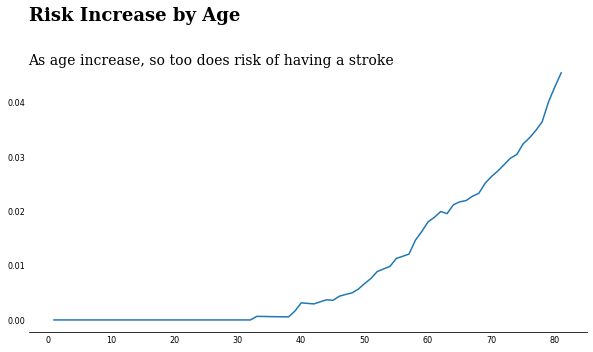

In [21]:
fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot()

data['age'] = data['age'].astype(int)

# Calculate the rate of a person getting stroke as a function of age
rate = []
for i in range(data['age'].min(), data['age'].max()):
    rate.append(data[data['age'] < i]['stroke'].sum() / len(data[data['age'] < i]['stroke']))

# Draw a lineplote 
sns.lineplot(data=rate,ax=ax0)

# Remove the top, right, and left surrounding line for aesthetic purposes
for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

# Adjust the tick appearance for aesthetic purposes
ax0.tick_params(axis='both', which='major', labelsize=8)
ax0.tick_params(axis='both', which='both',length=0)

# Add some text on the figure
ax0.text(-3,0.055,'Risk Increase by Age',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-3,0.047,'As age increase, so too does risk of having a stroke',fontsize=14,fontfamily='serif')

plt.show()

Yup, as expected, the higher the age, the higher the chance of getting a stroke. 

## Data Preprocessing

Looking at the previous section, there are a few things we need to do before we can start training an ML model, and among them are:
- Convert categorical data to numerical data
- Standardize the range of our datasets

In [46]:
# Find categorical features, along with its values; we do this by exploiting the fact that categorical features has a data type of 'object'
cat_features = []

for col in data.columns:
    if data[col].dtype == "object":
        cat_features.append(col)
        print(col)
        print(data[col].unique())

gender
['Female' 'Male']
ever_married
['No' 'Yes']
work_type
['Private' 'Govt_job' 'children' 'Self-employed']
Residence_type
['Urban' 'Rural']
smoking_status
['formerly smoked' 'smokes' 'never smoked' 'Unknown']


In [47]:
# Encoding categorical values
data['gender'] = data['gender'].replace({'Male':0,'Female':1}).astype(np.uint8)
data['ever_married'] = data['ever_married'].replace({'No':0,'Yes':1}).astype(np.uint8)
data['work_type'] = data['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.uint8)
data['Residence_type'] = data['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
data['smoking_status'] = data['smoking_status'].replace({'formerly smoked':0,'smokes':1,'never smoked':2,'Unknown':3}).astype(np.uint8)

In [48]:
# Let's check our dataset to see whether categorical data has been changed to numerical data
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,18.0,0,0,0,0,1,101.95,46.0,0,0
1,0,60.0,0,0,1,0,1,129.16,33.6,1,0
2,1,21.0,0,0,0,0,1,91.01,28.7,2,0
3,1,22.0,0,0,0,0,1,69.94,22.8,3,0
4,1,78.0,0,0,1,2,1,58.88,35.8,3,0


Cool! Now we have converted all the categorical features in our dataset into numerical features. A fast way of doing this is by using [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html#sklearn.preprocessing.OrdinalEncoder) provided by scikit-learn.

Next, let's standardize the numerical feature that has a wide range

In [25]:
scaler = StandardScaler()
data[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])

# Verify that our feature has been standardized
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,-1.114729,0,0,0,0,1,-0.090265,2.582654,0,0
1,0,0.735565,0,0,1,0,1,0.514328,0.756992,1,0
2,1,-0.982565,0,0,0,0,1,-0.333347,0.035561,2,0
3,1,-0.938510,0,0,0,0,1,-0.801513,-0.833101,3,0
4,1,1.528548,0,0,1,2,1,-1.047261,1.080900,3,0


Our data is now has been standardized, and all value is in numerical value, which is the basic requirement before we can start wheeling out our ML training operation.

And the last step we need to do is to: 

1. **Separate the features and label**.
This is a requirement when training our dataset. It enables the scikit-learn function to differentiate between the input and output.

2. **Split our data into training and test sets**. 
The training set as the name goes by is the dataset on which our models will be trained on. Once the training procedure is finished, we then test our ML model with our newly created test set. This will provide us with **generalisation error**, which is a measure of how accurately an algorithm can predict the outcome based on unseen data (which is what we are trying to do eventually!). Plus, it will also provide us with a tool to compare different models we have trained before finally deciding which model to use for our submission. Bam!

In [26]:
# Separate our data into X, which contains all the features in our dataset and y, which contains only the output/label (stroke)
X = data.drop(columns=['stroke'])
y = data['stroke']

In [27]:
# Verify that we have correctly separate the features and the output by looking at the shape of X and y
print(X.shape)
print(y.shape)

(4500, 10)
(4500,)


In [28]:
# Split our features and output into training and test set
# In this case, because test_size parameter is equal to 0.2, our testing set will have 20% the data while training set will have 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TO-DO: Try changing the test_size and see whether it changes the performance of our model

In [29]:
# Verify that the operation ran as intended by checking the shape of the splitted dataset
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (3600, 10)
Shape of X_test: (900, 10)
Shape of y_train: (3600,)
Shape of y_test: (900,)


## Model Training

This is where the magic begins. As an example, we will be training our dataset by using three different models and choosing the best model for the submission later.
The model we will be using are [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), [Support Vector Machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), and [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
Bear in mind that each of the models has its own hyperparameter that you can tune to get a better performance. Do check the documentation of each model!

In [30]:
clf_lr = LogisticRegression()
clf_lr.fit(X=X_train, y=y_train)

clf_svm = SVC()
clf_svm.fit(X=X_train, y=y_train)

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

## Model Testing
Now that we have trained our machine learning model, we can test it on our test set

In [31]:
# use .predict() function for doing the prediction on our test set
lr_predicted = clf_lr.predict(X_test)
svm_predicted = clf_svm.predict(X_test)
tree_predicted = clf_tree.predict(X_test)

In [32]:
# we will be using accuracy_score() function as our evaluation metric. .accuracy_score() function simply calculate the number of prediction that is correct and divide it by the total number of predictions.
lr_accuracy = accuracy_score(lr_predicted, y_test)
svm_accuracy = accuracy_score(svm_predicted, y_test)
tree_accuracy = accuracy_score(tree_predicted, y_test)

print("Accuracy (Logistic Regression): ", lr_accuracy)
print("Accuracy (SVM): ", svm_accuracy)
print("Accuracy (Decision Tree): ", tree_accuracy)

Accuracy (Logistic Regression):  0.9344444444444444
Accuracy (SVM):  0.9344444444444444
Accuracy (Decision Tree):  0.91


Neat! We can see that logistic regression and SVM performed equally with each other (with about 95% accuracy), while our decision tree is a bit left behind.

But, let's put things back into perspective. Right now, we are doing an imbalanced classification problem, where only 5% of our output has a value of 1. Hence, even if we predict all the output as 0, we can easily achieve 95% of accuracy. So, there is definitely a long way to go in regards to producing a model that is able to predict accurately whether a person has a stroke or not. 

Confusion Matrix (Logistic Regression)

Confusion Matrix (SVM)

Confusion Matrix (Decision Tree)


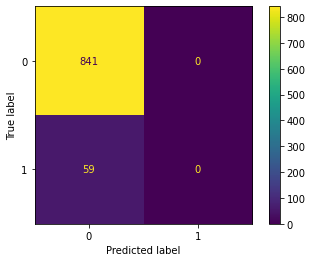

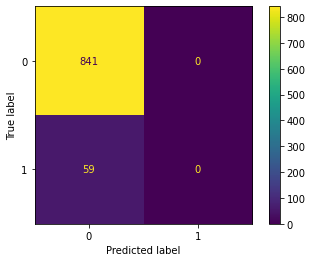

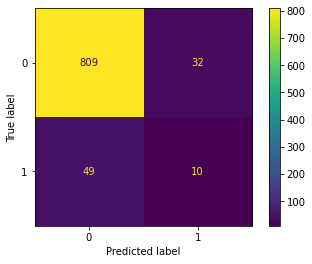

In [33]:
# We can do further analysis by plotting a confusion matrix
print("Confusion Matrix (Logistic Regression)")
print(ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=lr_predicted))

print("\nConfusion Matrix (SVM)")
print(ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=svm_predicted))

print("\nConfusion Matrix (Decision Tree)")
print(ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=tree_predicted))

## Submission 
Once we are really sure with the performance of our model, we can start deploying it into the real testing set (dataset for submission)

In [34]:
# First, let's import our test dataset and save it in a variable called data_test
data_test = pd.read_csv("./data/test.csv")          # Change the PATH accordingly 

Then, we must preprocess the dataset before feeding it into the trained model. The preprocess steps include: 
1. Convert categorical data into numerical data
2. Standardize numerical dataset that has a large range

In [49]:
# Encoding categorical values
data_test['gender'] = data_test['gender'].replace({'Male':0,'Female':1}).astype(np.uint8)
data_test['ever_married'] = data_test['ever_married'].replace({'No':0,'Yes':1}).astype(np.uint8)
data_test['work_type'] = data_test['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4}).astype(np.uint8)
data_test['Residence_type'] = data_test['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
data_test['smoking_status'] = data_test['smoking_status'].replace({'formerly smoked':0,'smokes':1,'never smoked':2,'Unknown':3}).astype(np.uint8)

In [50]:
# Standardize numerical feature that has a large range
scaler = StandardScaler()
data_test[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data_test[['age', 'avg_glucose_level', 'bmi']])

# Check the shape of our submission dataset
print(f"Shape: {data_test.shape}")

# Verify that our feature has been standardized
data_test.head()

Shape: (481, 10)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,-0.997061,0,0,0,0,1,0.768523,-0.868655,1
1,0,1.406041,0,0,1,0,0,2.830568,0.803643,0
2,0,-1.264072,0,0,0,0,0,-0.326433,-0.350686,2
3,1,-1.041563,0,0,0,0,0,-0.743527,-0.720664,2
4,1,-0.507540,0,0,1,0,0,-0.463494,-0.380285,2


Once we have done all the preprocessing stages, we can proceed to do prediction on the submission dataset.

In [51]:
# We will be choosing Logistic Regression model as it shows the best performance compared to SVM and decision trees
predicted = clf_lr.predict(data_test)

In [52]:
predicted.shape

(481,)

It seems that the output shape is what it should have, which is 481 entries. Now, we are ready for submitting our prediction. 

**Doxa Submission**

In [39]:
# Code to be inserted here

Yayy! You have submitted (probably) your first submission on DOXA!

## Possible Improvements

As we are already aware, our model is not that good at predicting stroke since most (if not all) of its output is 0. There are a few ways in which we can improve upon our model:

**1. Data Visualisation**
- Visualise other features as well (on top of the age of the person) to see if there is any correlation with a person getting a stroke. 

**2. Data Preprocessing**
- Implement [PCA algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), which will reduce the input features to the one that only matters for us. We choose 'n' input features that have the highest orthogonality. 'n' is a hyperparameter, so tuning needs to be done to get the best performance.

**3. Dealing with Imbalanced Dataset**
- The challenge of working with imbalanced datasets is that most ML models will ignore the minority class (as you can see if you run through a decision matrix on SVM and Logistic Regression earlier).
- One approach to address this is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these will not create any meaningful information for the model. Instead, new examples can be synthesized from the existing examples. This type of data augmentation is referred to as SMOTE, or [Synthetic Minority Oversampling Technique](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/).

**4. Model Selection**
- In our example, we have looked at implementing [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [support vector machine](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), and [decision trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Each of these models has its hyperparameter that you can tweak which may or may not improve your model performance. The link will bring you to the documentation page of scikit learn where you can discover the hyperparameter of the model that you can tune
- On top of that, there are many more ML models that you can try to implement and see whether it improves accuracy or not. If you go to the earlier section of the notebook where we import relevant libraries, there are a lot of ML models that have been imported through sklearn that I did not use. Try to implement some of them and see whether it improves the accuracy or not.

And perhaps, many more...